In [1]:
import os
import pandas as pd
import seaborn as sns

import flaws_correction as fc

#### TASK 1 

You’re given raw data that contains many flaws. 
Please find 5 different flaws in the data and fix them. Try to find the most important flaws that require to be fixed in order to enable forecasting (task 2)

##### FLAW 1

In [2]:
# Flaw #1: different file formats with different headers - spoiler: mainly all flaws is because of this issue
# Fixed mainly with data_merge.py - recorded all available data in separate file for each region-country pair
# But now the task is to understand how to merge them together
# Let's examine case with France:

In [3]:
[f for f in os.listdir(os.path.join("data", "countries_data")) if "france" in f.lower()]

['French Polynesia, France.csv',
 'French Guiana, France.csv',
 'Mayotte, France.csv',
 'Reunion, France.csv',
 'St Martin, France.csv',
 'France, France.csv',
 ',,France.csv',
 'Saint Pierre and Miquelon, France.csv',
 'Martinique, France.csv',
 'France.csv',
 'Fench Guiana, France.csv',
 'Guadeloupe, France.csv',
 'Saint Barthelemy, France.csv',
 'New Caledonia, France.csv']

In [4]:
# There are 3 similar files with France: 'France, France.csv',',,France.csv','France.csv',
# This bunch of data is well structured, but still during this flaw correction I check that:
# dates don't intersect & there are no gaps in data
# developed a function to correct this flaw when modeling single country - merge_single_country_files
# it checks that df dates do not intersect and merge them together

In [5]:
france_df1 = pd.read_csv(os.path.join("data", "countries_data", 'France, France.csv'))
france_df2 = pd.read_csv(os.path.join("data", "countries_data", ',,France.csv'))
france_df3 = pd.read_csv(os.path.join("data", "countries_data", 'France.csv'))
france_df = fc.merge_single_country_files([france_df1, france_df2, france_df3])
france_df

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,date
0,2.0,NaN,NaN,NaN,NaN,NaN,01-24-2020
1,3.0,NaN,NaN,NaN,NaN,NaN,01-25-2020
2,3.0,NaN,NaN,NaN,NaN,NaN,01-26-2020
3,3.0,NaN,NaN,NaN,NaN,NaN,01-27-2020
4,4.0,NaN,NaN,NaN,NaN,NaN,01-28-2020
...,...,...,...,...,...,...,...
144,192628.0,29512.0,70223.0,92893.0,NaN,NaN,06-17-2020
145,192948.0,29540.0,70322.0,93086.0,NaN,NaN,06-18-2020
146,193493.0,29554.0,70496.0,93443.0,NaN,NaN,06-19-2020
147,193907.0,29570.0,70641.0,93696.0,NaN,NaN,06-20-2020


#### FLAWS 2 & 3

In [6]:
# Let's use same France dataframe for this demonstration
# Missing value imputation - you can't just input data with gaps into model
# First you have to replace nan values with some numbers (constant, mean, median, ffill, bfill, interpolation etc.)
# But for time series you have to be careful to not to lok into the future - avoid data leakages

# For flaw 2 I selected most "natural case": constant (0) imputation for columns Deaths and Recovered
# assuming that if we had no data for this columns - probably there where no such persons

# For flaw 3 I selected smart imputation - we have formulas for some columns:
# Active = Confirmed - Deaths - Recovered
# Incident_Rate = cases per 100,000 persons - will have to use additional info of population per country
# Case_Fatality_Ratio = Deaths / Confirmed
# So after fixing Deaths and Recovered with constant imputations we can fix these cols with their formulas

In [7]:
france_df.head(10)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,date
0,2.0,NaN,NaN,NaN,NaN,NaN,01-24-2020
1,3.0,NaN,NaN,NaN,NaN,NaN,01-25-2020
2,3.0,NaN,NaN,NaN,NaN,NaN,01-26-2020
3,3.0,NaN,NaN,NaN,NaN,NaN,01-27-2020
4,4.0,NaN,NaN,NaN,NaN,NaN,01-28-2020
5,5.0,NaN,NaN,NaN,NaN,NaN,01-29-2020
6,5.0,NaN,NaN,NaN,NaN,NaN,01-30-2020
7,5.0,NaN,NaN,NaN,NaN,NaN,01-31-2020
8,6.0,0.0,0.0,NaN,NaN,NaN,02-01-2020
9,6.0,0.0,0.0,NaN,NaN,NaN,02-02-2020


In [8]:
france_df["Deaths"] = france_df["Deaths"].apply(fc.impute_with_value)
france_df["Recovered"] = france_df["Recovered"].apply(fc.impute_with_value)

In [9]:
france_df.head(10)

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,date
0,2.0,0.0,0.0,NaN,NaN,NaN,01-24-2020
1,3.0,0.0,0.0,NaN,NaN,NaN,01-25-2020
2,3.0,0.0,0.0,NaN,NaN,NaN,01-26-2020
3,3.0,0.0,0.0,NaN,NaN,NaN,01-27-2020
4,4.0,0.0,0.0,NaN,NaN,NaN,01-28-2020
5,5.0,0.0,0.0,NaN,NaN,NaN,01-29-2020
6,5.0,0.0,0.0,NaN,NaN,NaN,01-30-2020
7,5.0,0.0,0.0,NaN,NaN,NaN,01-31-2020
8,6.0,0.0,0.0,NaN,NaN,NaN,02-01-2020
9,6.0,0.0,0.0,NaN,NaN,NaN,02-02-2020


In [10]:
# Deaths and Recovered columns are imputed with 0s - can move on to 
# formulas of Active, Incident_Rate, Case_Fatality_Ratio
# I decided not to impute, but to calculate everything from scratch - easier

In [11]:
france_df = fc.active_cases_calculation(france_df)
france_df = fc.incident_rate_calculation(france_df, population_mln=67.5)
france_df = fc.case_fatality_ratio_calculation(france_df)

In [12]:
france_df

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,date
0,2.0,0.0,0.0,2.0,0.002963,0.000000,01-24-2020
1,3.0,0.0,0.0,3.0,0.004444,0.000000,01-25-2020
2,3.0,0.0,0.0,3.0,0.004444,0.000000,01-26-2020
3,3.0,0.0,0.0,3.0,0.004444,0.000000,01-27-2020
4,4.0,0.0,0.0,4.0,0.005926,0.000000,01-28-2020
...,...,...,...,...,...,...,...
144,192628.0,29512.0,70223.0,92893.0,285.374815,15.320722,06-17-2020
145,192948.0,29540.0,70322.0,93086.0,285.848889,15.309824,06-18-2020
146,193493.0,29554.0,70496.0,93443.0,286.656296,15.273938,06-19-2020
147,193907.0,29570.0,70641.0,93696.0,287.269630,15.249578,06-20-2020


#### FLAW 4

In [13]:
# features are strongly correlated - a lot of redundant inforamtion that can harm our models
# Flaw #4 - remove highly correlated features
# Frankly speaking, I usually use theshold +-0.7 for correlated features removal, but in this case, we'll get 
# only "Confirmed" vector, so, just for demonstration of function capability - I use threshold .999
# See EDA for examples
# WARNING: this transformation should be done on training set and only then applied to test set to not leak data

In [14]:
france_df = fc.drop_correlated_features(france_df, threshold=.999)  
france_df.head()  # dropped Incident_Rate, as it is just scaled Confirmed

,Confirmed,Deaths,Recovered,Active,Case_Fatality_Ratio,date
0,2.0,0.0,0.0,2.0,0.0,01-24-2020
1,3.0,0.0,0.0,3.0,0.0,01-25-2020
2,3.0,0.0,0.0,3.0,0.0,01-26-2020
3,3.0,0.0,0.0,3.0,0.0,01-27-2020
4,4.0,0.0,0.0,4.0,0.0,01-28-2020


#### FLAW 5

In [15]:
# features are not normalised this causes different scales of features, that some algoritms don't accept
# Let's normalise some of them with some min-max scaling
# WARNING: this transformation should be done on training set and only then applied to test set to not leak data

<AxesSubplot:xlabel='Confirmed', ylabel='Count'>

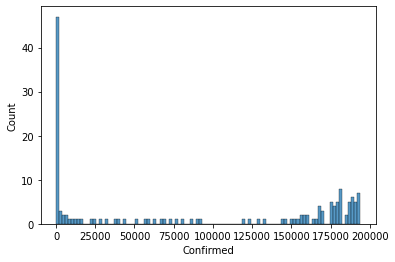

In [16]:
sns.histplot(x="Confirmed", data=france_df, bins=100)

In [17]:
france_df = fc.min_max_scaling(france_df, scale_features=["Confirmed", "Deaths"])  

<AxesSubplot:xlabel='Confirmed', ylabel='Count'>

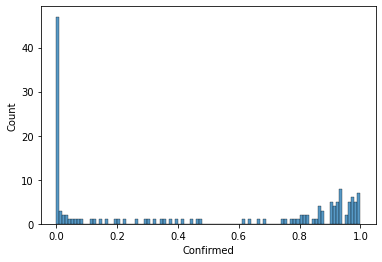

In [18]:
sns.histplot(x="Confirmed", data=france_df, bins=100)

#### TASK 2

Please describe (no code is needed) what will be the process required for forecasting the future number of active patients per country.

Hence we have data saved in convenient way (one file for each country-region) for this task, I would like to try following approaches:
- classical time series forecasting algorithms of family (S)AR(I)MA(X), using only target feature as an input and forecasting future cases with autoregressive modeling. From my experience these models work not so good on complex data (e.g. stocks) but may work good with this data. Of course, deep analysis should be done including trend/sesonality/stationarity checks. Based on this analysis we'll be able to understand what would be an optimal way of representing time series in autoregressive models.
- jumping from time series task to a task of supervised learning - this is my favorite apporoach of forecasting time series and from my experience this works great on complex data. Let's stick to this method in following chapters.

So the task is to represent data for supervised learning algorithm. We have to decide horison of forecasting - 
let's assume 1 for simplicity (means we'll forecast cases for the next day). 
I would like to describe 4 important points for this kind of modeling:
- cross-validation strategy
- target
- features
- models

#### Target

This is an important step to decide. However, we can experiment with different approaches here. I see following sane approaches:
- value of Confirmed at step (t+1)
- diff value of Confirmed at step (t+1): Confirmed(t+1) - Confirmed(t) <- best way to go
- MA of Confirmed on some window at step (t+1)

#### Cross-validation

This is also an important step, as this should be a simulation of how model would perform in production. We can't use simple KFold for time series, better to use something more complicated - like roll-forward cross validation. I would like to try Time Series Split Cross-Validation or Blocked Cross-Validation.


#### Features

Features I see for this task are:
- lag matrices of target (Confirmed)
- diff matrices of target (Confirmed)
- Moving averages (MA, EMA, etc.)
- Features available for dataset: Deaths, Recovered, Active, Incident_Rate, Case_Fatality_Ratio with their aggregation on some window(s) and cumulative ratios where its sane to do so
- Externally added features: general country info - wealth, GDP, total population, population density (use if fitting one-model-fits-all approach)
- Handcrafted features like exp, pow(s) of a target, local predictions with simple models (like lin regression prediction from past week data) etc.
- arrgegated features from neighboring countries (AVG number of cases, deaths, etc)

If we want to get predictions for the whole country, not just specific region, we'll have to aggregate cross-country features from all regions (sum up cases, deaths, etc.) 

No matter how much features we generate and use, we always have an ability to select best ones using:
- feature importances (e.g. from RF model)
- recursive feature elimination (or any other feature selection method of your choice)

Important note here to consider: during feature generation we should be very careful to not impute future data to feature matrix (data leakege), as it will result into surprisingly great results during development but will fail to generalise at all.

#### Models

This is the most fascinating step, as it includes a lot of experimentation.

I would like to stick to some classical ML algorithms (tree-based: RF, Gradient boosting; linear: regression, SVM) and also try to fit some DL models that fit ok to TS tasks (simple MLP, multi-head MLP to cover multi-task learning features; RNNs: vanilla RNN, LSTM, GRU; 1D-CNN; Attention-based transformers)

But, again, following Occam's razor and Python principles: simple is better then complicated

Training pipeline is simple: using described CV strategy: fit a model on traing split, evaluate it on validation split. Repeat for all splits. Record model results to some external file for further analysis and model selection.

At the end, with best model(s) selected, we can tune hyperparamethers with some search algorithm (random search, grid search, Bayesian optimisation, genetic algorithm - I prefer using ray.tune or pygad for this)

During evaluation it's important to track that model doesn't just repeat past value (lazy prediction - output Confirmed(t) as a prediction) and does not just learns mean value of series (again lazy model can just learn mean(Confirmed(0:t))).